In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as d
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()

In [3]:
data = pd.read_csv('../data/data_2010_2021.csv', parse_dates=['Date']).set_index('Date')
data['date'] = data.index
data.head()

,stock_closing_usd,sentiment_global_index,sentiment_finance_index,DOW JONES COMPOSITE AVERAGE,DOW JONES INDUSTRIAL AVERAGE,DOW JONES TRANSPORTATION AVERAGE,DOW JONES UTILITY AVERAGE,S&P 500,ICE BRENT CRUDE OIL FUTURES,NYMEX CRUDE OIL FUTURES,...,WALKING_UNITED STATES_WEST VIRGINIA,WALKING_UNITED STATES_WISCONSIN,WALKING_UNITED STATES_WYOMING,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,PARKS PERCENT CHANGE FROM BASELINE,RESIDENTIAL PERCENT CHANGE FROM BASELINE,RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE,TRANSIT STATIONS PERCENT CHANGE FROM BASELINE,WORKPLACES PERCENT CHANGE FROM BASELINE,date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-02
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-03
2010-01-04,69.15,NaN,NaN,NaN,1.82,NaN,NaN,NaN,80.12,81.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04
2010-01-05,69.42,NaN,NaN,NaN,1.82,NaN,NaN,NaN,80.59,81.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-05


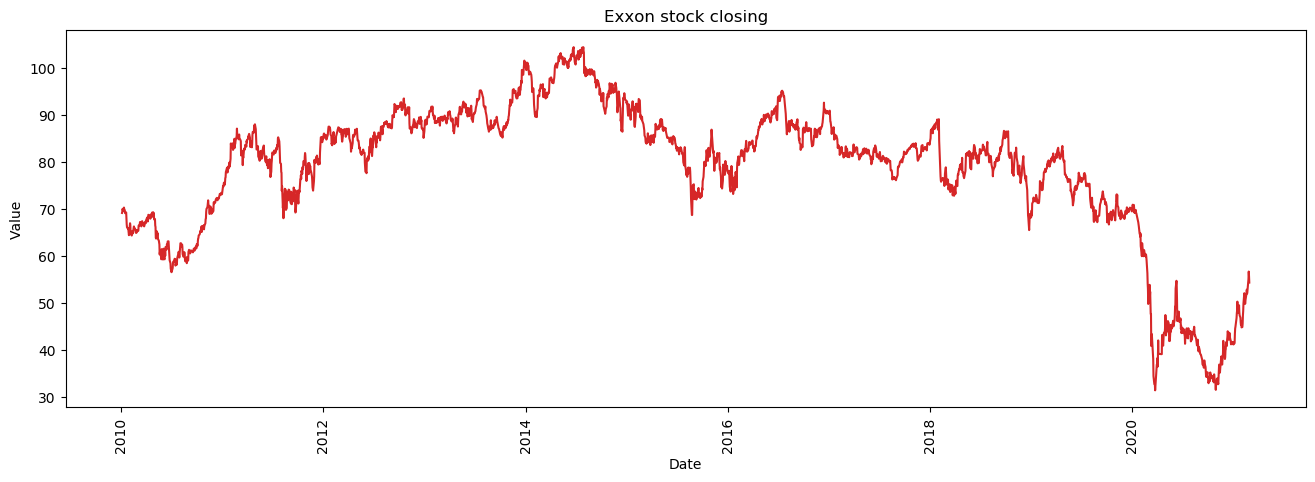

In [4]:
df = data.copy()
df = df.dropna(subset=['stock_closing_usd'])
plot_df(df, x=df.index, y=df.stock_closing_usd, title='Exxon stock closing')

In [5]:
import matplotlib as mpl

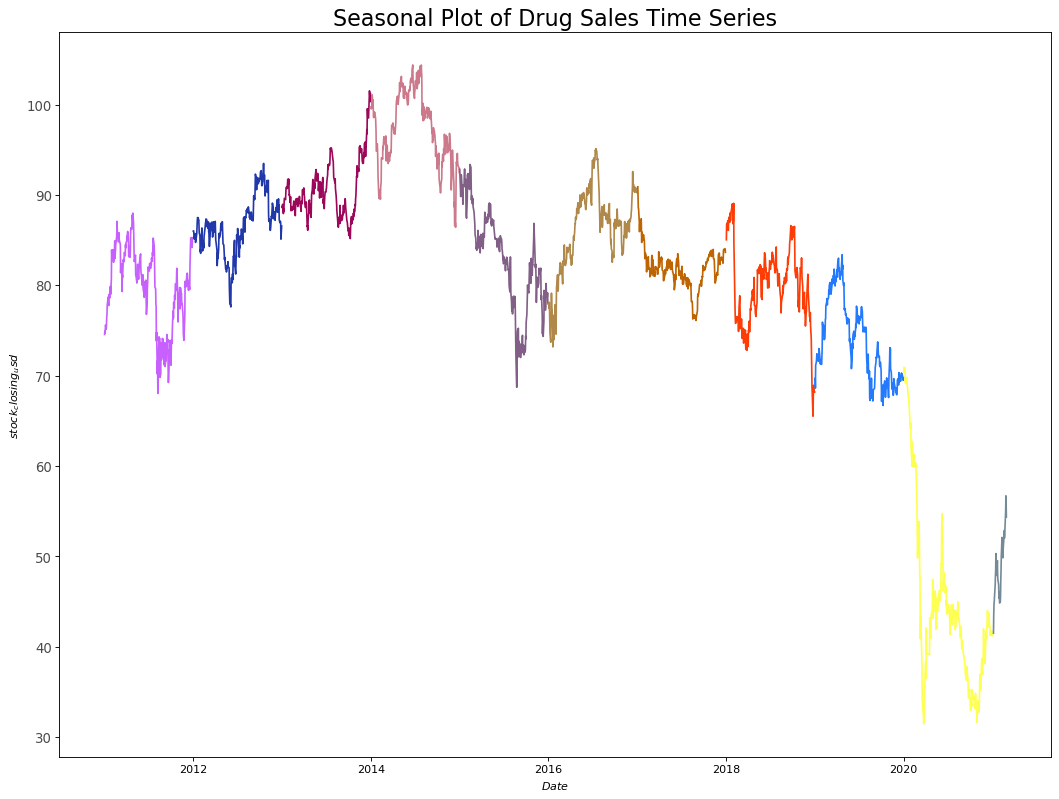

In [6]:
# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('date', 'stock_closing_usd', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        # plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'stock_closing_usd'][-1:].values[0], y, fontsize=8, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='$stock_closing_usd$', xlabel='$Date$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

plt.show()

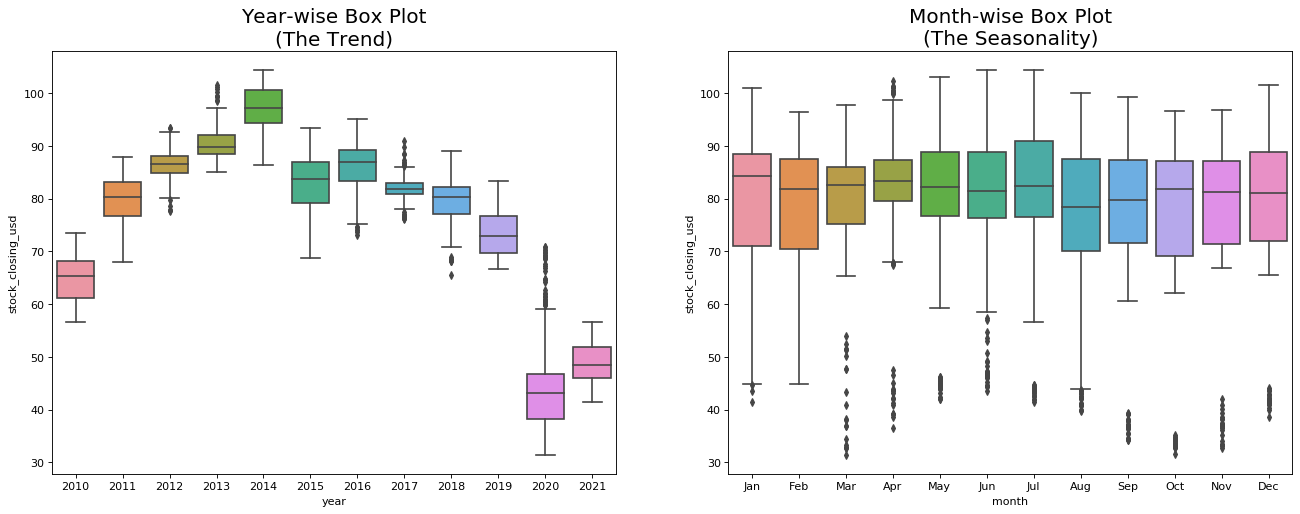

In [7]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='stock_closing_usd', data=df, ax=axes[0])
sns.boxplot(x='month', y='stock_closing_usd', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [8]:
df['stock_closing_usd']

Date
2010-01-04    69.15
2010-01-05    69.42
2010-01-06    70.02
2010-01-07    69.80
2010-01-08    69.52
              ...  
2021-02-22    54.30
2021-02-23    55.05
2021-02-24    56.70
2021-02-25    55.76
2021-02-26    54.37
Name: stock_closing_usd, Length: 2801, dtype: float64

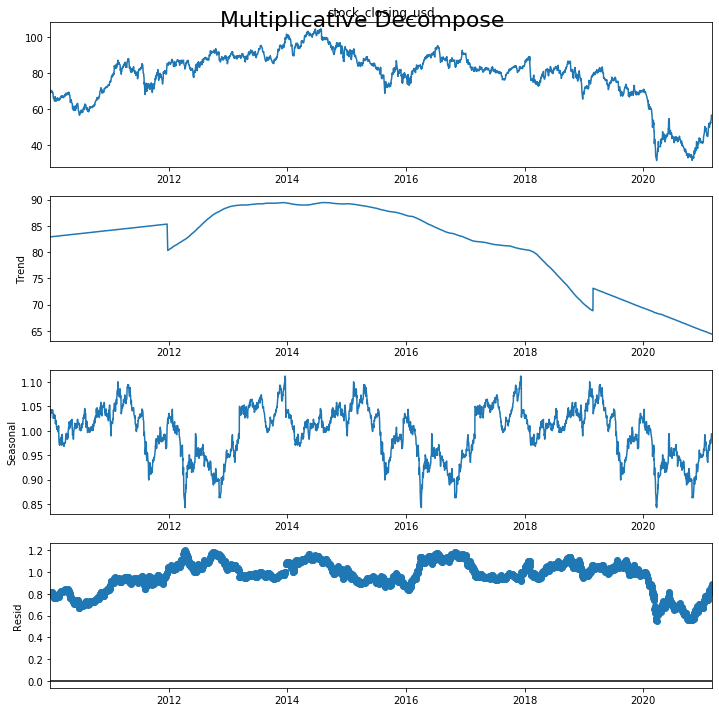

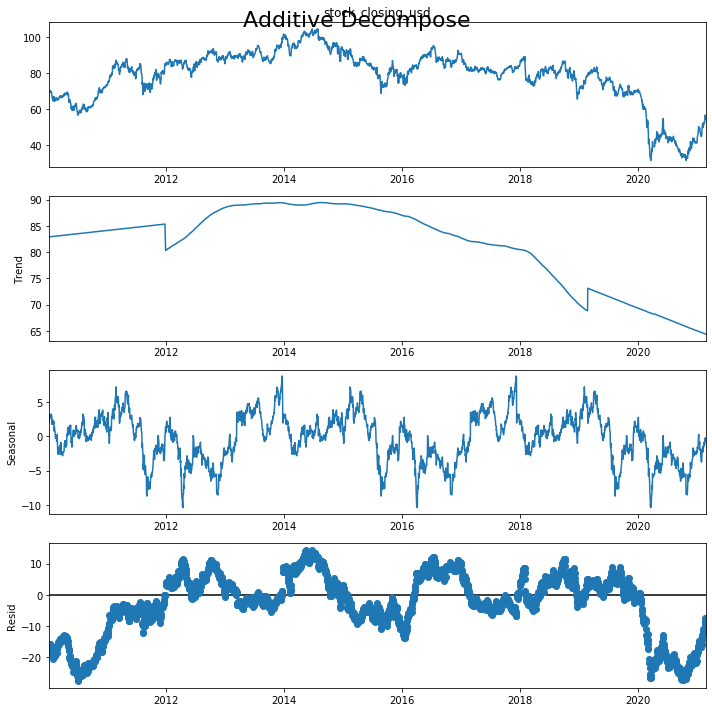

In [9]:

# Multiplicative Decomposition 
result_mul = seasonal_decompose(x=df['stock_closing_usd'],model='multiplicative', extrapolate_trend='freq', freq=1000)

# # Additive Decomposition
result_add = seasonal_decompose(df['stock_closing_usd'], model='additive', extrapolate_trend='freq', freq=1000)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

C:\Users\ooi.weixin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0, 0.5, 'Exxon stock closing in usd')

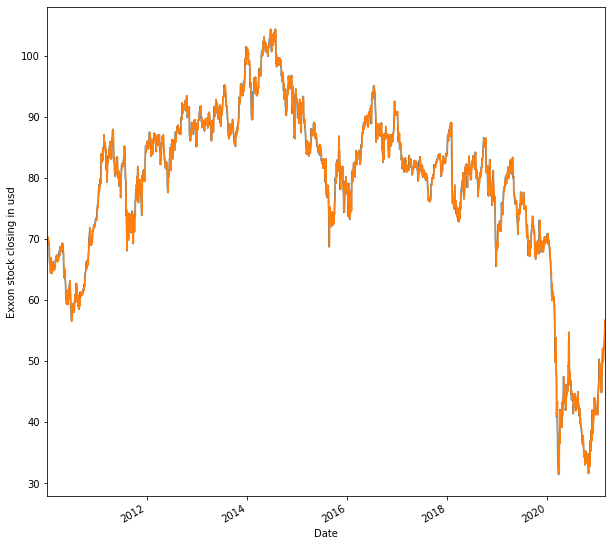

In [24]:
model = ETSModel(df['stock_closing_usd'])
fit = model.fit(maxiter=10000)
df['stock_closing_usd'].plot(label="data")
fit.fittedvalues.plot(label='statsmodels fit')
plt.ylabel("Exxon stock closing in usd")

In [25]:
print(fit.summary())

                                 ETS Results                                  
Dep. Variable:      stock_closing_usd   No. Observations:                 2801
Model:                       ETS(ANN)   Log Likelihood               -3971.165
Date:                Tue, 16 Mar 2021   AIC                           7948.331
Time:                        22:38:37   BIC                           7966.144
Sample:                             0   HQIC                          7954.760
                               - 2801   Scale                            0.998
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9781      0.018     53.393      0.000       0.942       1.014
initial_level      69.1527      0.999     69.249      0.000      67.196      71.110
Ljung-Box (Q):                  